This final file continues the comparison of Action Movie Hits vs. Misses

This one looks at POS (parts of speech) to see if there are any
types of words that are more common in Hits vs Misses

In [66]:
import os
os.chdir('/Users/martinkihn/Desktop')

In [67]:
import re
import unicodedata
import nltk
from nltk import FreqDist
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [68]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
           .encode('ascii', 'ignore')
           .decode('utf-8', 'ignore')
           .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [69]:
with open('spoiler_text_files/action_hits.txt', 'r') as file:
    action_hits = file.read()

In [70]:
with open('spoiler_text_files/action_misses.txt', 'r') as file:
    action_misses = file.read()

In [71]:
len(action_hits), len(action_misses)

(738214, 978356)

In [72]:
action_hits = basic_clean(action_hits)

In [73]:
action_misses = basic_clean(action_misses)

In [74]:
len(action_hits), len(action_misses)

(70669, 95207)

In [75]:
hits_str = ' '.join(action_hits)

In [76]:
misses_str = ' '.join(action_misses)

In [77]:
#tokenize the strings
hits_tokens = nltk.word_tokenize(hits_str)
misses_tokens = nltk.word_tokenize(misses_str)

In [78]:
#convert into text object
hits_text = nltk.Text(hits_tokens)
misses_text = nltk.Text(misses_tokens)

In [79]:
pos_hits = nltk.pos_tag(hits_tokens)

In [80]:
pos_misses = nltk.pos_tag(misses_tokens)

In [81]:
#group tuples by POS
output_hits = {}
for x, y in pos_hits:
    if y in output_hits:
        output_hits[y].append((x, y))
    else:
        output_hits[y] = [(x, y)]

In [82]:
output_misses = {}
for x, y in pos_misses:
    if y in output_misses:
        output_misses[y].append((x, y))
    else:
        output_misses[y] = [(x, y)]

In [83]:
import numpy as np
import collections
from collections import Counter
from itertools import chain

In [102]:
count_dict_hits = dict.fromkeys(output_hits.keys(), 0)

In [103]:
count_dict_misses = dict.fromkeys(output_misses.keys(), 0)

In [104]:
for pos in output_hits:
    count_dict_hits[pos] = len(output_hits[pos])

In [105]:
for pos in output_misses:
    count_dict_misses[pos] = len(output_misses[pos])

In [106]:
#get pcts of words by POS
pct_dict_hits = dict.fromkeys(output_hits.keys(), 0)
s = sum(count_dict_hits.values())
for k, v in count_dict_hits.items():
    pct_dict_hits[k] = v * 100.0 / s

In [107]:
pct_dict_misses = dict.fromkeys(output_misses.keys(), 0)
s = sum(count_dict_misses.values())
for k, v in count_dict_misses.items():
    pct_dict_misses[k] = v * 100.0 / s

In [108]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 9
z_hits = dict(sorted(pct_dict_hits.items(), key=lambda item: item[1]))

In [109]:
del z_hits['NN'] ##remove nouns and adjectives -- too common
del z_hits['JJ']

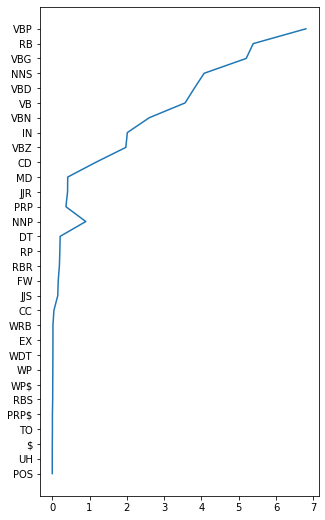

In [111]:
z_hits = z_hits.items()
x, y_hits = zip(*z_hits)
plt.plot(y_hits, x)
plt.show()

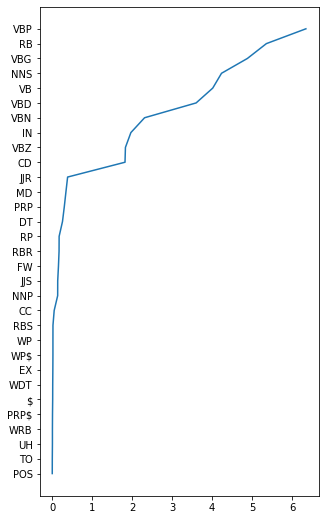

In [112]:
z_misses = dict(sorted(pct_dict_misses.items(), key=lambda item: item[1]))
del z_misses['SYM']
del z_misses['NN']
del z_misses['JJ']
z_misses = z_misses.items()
x, y_misses = zip(*z_misses)
plt.plot(y_misses, x)
plt.show()

In [113]:
# x = POS, y_hits = counts hits, y_misses = counts misses

# Comparing POS Frequencies

The plot below overlays POS freq's for Action Hits & Misses (as labeled) -- it backs up my hypothesis that Action movies have more action verbs, verbs and proper nouns (definite nouns) in their spoilers. More striking is the degree of difference among the parts of speech - and the patterns in general.

Perhaps the difference between hits and misses is not their plot language but other factors - actors, production values, franchises, etc. More exploration is needed.

In [114]:
#tick marks
import numpy as np
ynumbers = np.linspace(0, 50, 5)

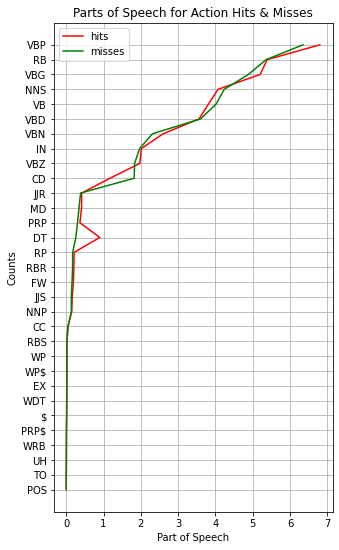

In [115]:
plt.plot(y_hits, x, color = 'r', label='hits')
plt.plot(y_misses, x, color = 'g', label='misses')
plt.xlabel("Part of Speech")
plt.ylabel("Counts")
plt.title("Parts of Speech for Action Hits & Misses")
plt.legend()
plt.grid()
plt.show()

In [120]:
set(output_hits['DT'])

{('an', 'DT'),
 ('another', 'DT'),
 ('azeroth', 'DT'),
 ('either', 'DT'),
 ('every', 'DT'),
 ('fall', 'DT'),
 ('heimdall', 'DT'),
 ('krall', 'DT'),
 ('neither', 'DT'),
 ('toth', 'DT'),
 ('wall', 'DT')}

In [ ]:
##DT is 'Determiner' - it seems to be a bit haphazard